In [1]:
from konlpy.tag import Okt #open korean text
okt = Okt()  
token = okt.morphs("나는 자연어 처리를 배운다")  
print(token)

['나', '는', '자연어', '처리', '를', '배운다']


In [2]:
with open('data/gift.txt','r') as f:
    gift_text = f.read()

In [3]:
gift_text

방면의 효능도 담겼다. \n벚꽃차는 예부터 한방에서 약이 되는 차로 알려져 있으며, 숙취나 식중독 등의 해독제로 사용되어 왔다. \n또한 신염, 당뇨병, 습진, 기침에 효과적이라고 한다벚꽃차는 벚꽃의 색과 향기, 모양을 그대로 담고 있어 \n차로 마실 때 무척이나 아름답고, 효능까지 갖췄으니 소중한 지인들에게 선물하는 것도 추천한다.\n[한정판매]토닥토닥워터 벚꽃에디션 15일세트 레몬 딸기 벚꽃차 고흥유자\n판매처\n오늘도사랑해\nN페이 사용가능\n가격\n26,910원\n의미있는 선물은 손편지가 제일 좋을거 같구요...!\n비용이 어느정도인지 모르겠어서....\n저는 그냥 꾸준하게 비타민을 선물하고 있어서\n몇가지 비타민 상품 추천드리고, 혹시 디퓨저 이런거에도 관심있으면\n디퓨저도 추천해드릴게요!\nhttps://coupa.ng/bt59gJ\nNature\'s Way 얼라이브! 원스 데일리 울트라 포텐시 멀티 비타민 타블렛 2종 세트\nCOUPANG\ncoupa.ng\nhttps://coupa.ng/bt59qD\n솔가 네이처바이트 종합비타민 위드 미네랄 90정\nCOUPANG\ncoupa.ng\nhttps://coupa.ng/bt59zQ\n조말론 라임 바질 앤 만다린센트 써라운드 디퓨저 165ml\nCOUPANG\ncoupa.ng\n그래도 가장의미있는거는 진심어린 손편지이지 않을가 싶네요 ㅎㅎㅎ\n도움되셨기를 희망할게요 ^ ^ ~ \n무드미 무드등 추천드립니다~~ 여친한테 선물했는데 좋아하더라구용~!\nhttps://smartstore.naver.com/modernhada/products/3832117267\n무드미 16색 리모컨 달무드등 수면등 인테리어조명 수유등 : 무드미\n무드미 16색 리모컨 달무드등, 달무드등, 달조명, 수면등, 취침등, 수유등, 인테리어조명, 조명인테리어, 감성캠핑, 인테리어용품, 캠핑용품, 조명선물, 집들이선물, 집들이조명선물, 무드등, 감성조명, 수능선물, 수험생선물, 합격기원, 합격기원선물, 고3선물, 크리스마스선물, 연말선물

In [5]:
tokens = okt.nouns(gift_text) #okt.nouns() : 명사추출
tokens[:10]

['반지', '목걸이', '커플', '가디건', '커플', '모자', '신지', '몇개', '추천', '제품']

In [7]:
#gift_text 명사추출한 것 :tokens
#tokens 에서 영문자, 숫자 제거

# 영문자, 숫자 제거
import re
new_tokens = []
for token in tokens:
    text = re.sub('[a-zA-Z0-9]','',token)
    if text:  #text가 있으면
        new_tokens.append(text)

In [8]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [9]:
font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
plt.rc('font', family='AppleGothic')

In [10]:
import nltk

- 아래 두 셀을 반복해서 실행하며 stop_words를 갱신한다.

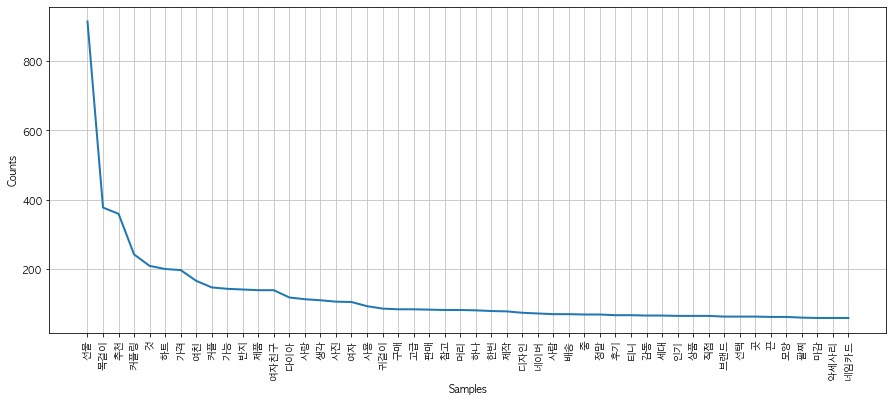

In [23]:
gf_gift = nltk.Text(new_tokens, name='여친선물')
plt.figure(figsize=(15,6))
gf_gift.plot(50)
plt.show()

In [21]:
stopwards = ['수','저','제','분','꽃','요','더','때','해','거','용','준','거','개']

In [22]:
new_tokens = [word for word in new_tokens if word not in stopwards]

## 워드클라우드 그리기

In [27]:
import numpy as np 
from PIL import Image
from wordcloud import WordCloud

In [28]:
data = gf_gift.vocab().most_common(300)

wc = WordCloud(
    font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf',
    relative_scaling=0.2,
    background_color = 'white',
).generate_from_frequencies(dict(data))

In [29]:
plt.figure(figsize=(12,12))

SyntaxError: invalid syntax (<ipython-input-29-6ae2bfad9a51>, line 1)

- 하트 그림에 표시하기

In [33]:
mask = np.array(Image.open('data/heart.jpg'))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [34]:
wc = WordCloud(
    font_path='/System/Library/Fonts/Supplemental/AppleGothic.ttf',
    relative_scaling = 0.3, mask=mask,
    background_color = 'white',
    min_font_size=1, max_font_size=100
).generate_from_frequencies(dict(data))

default_colors = wc.to_array()

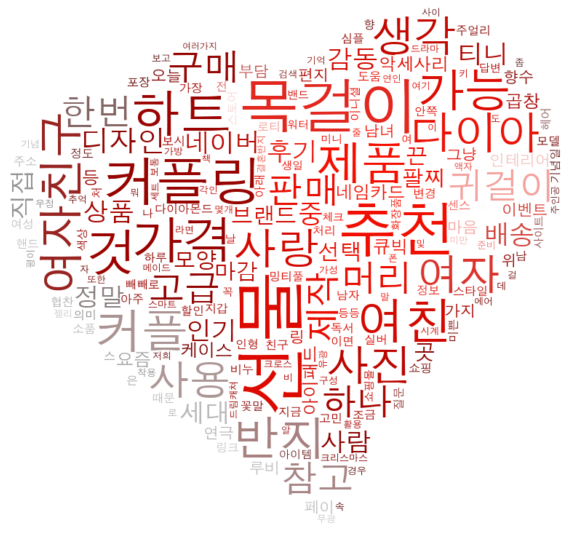

In [35]:
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()